<a href="https://colab.research.google.com/github/The-AI-Garage/wasteSorting/blob/main/WasteSorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SetUp 🔧

In [1]:
# Connect to Kaggle
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
# Download dataset
!kaggle datasets download -d kneroma/tacotrashdataset

! unzip "tacotrashdataset.zip"

In [ ]:
%pip install ultralytics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
# import libraries
import cv2 as cv
from ultralytics import YOLO
from PIL import Image, ImageDraw
import os
import random
import matplotlib.pyplot as plt

#EDA ⚡

In [ ]:
# check random images from the dataset
batches = ['/content/data/' + random.choice(os.listdir('/content/data/')) for i in range(10)]
batches

['/content/data/batch_3',
 '/content/data/batch_11',
 '/content/data/batch_3',
 '/content/data/batch_5',
 '/content/data/batch_8',
 '/content/data/batch_4',
 '/content/data/batch_1',
 '/content/data/batch_4',
 '/content/data/batch_5',
 '/content/data/batch_4']

In [ ]:
images = []
for batch in batches:
  image = batch + '/' + random.choice(os.listdir(batch))
  images.append(image)

images

['/content/data/batch_3/IMG_5044.JPG',
 '/content/data/batch_11/000039.jpg',
 '/content/data/batch_3/IMG_5048.JPG',
 '/content/data/batch_5/000091.JPG',
 '/content/data/batch_8/000031.jpg',
 '/content/data/batch_4/000048.JPG',
 '/content/data/batch_1/000047.jpg',
 '/content/data/batch_4/000066.JPG',
 '/content/data/batch_5/000097.JPG',
 '/content/data/batch_4/000077.JPG']

In [ ]:
# function to print images
def show_images(img_path: list, row: int, col: int):
    figure = plt.figure(figsize=(18,18))
    for i in range(len(img_path)):
        figure.add_subplot(row,col,i+1)
        img = cv.imread(img_path[i])
        plt.imshow(img)
        figure.tight_layout(pad=1)
    plt.show

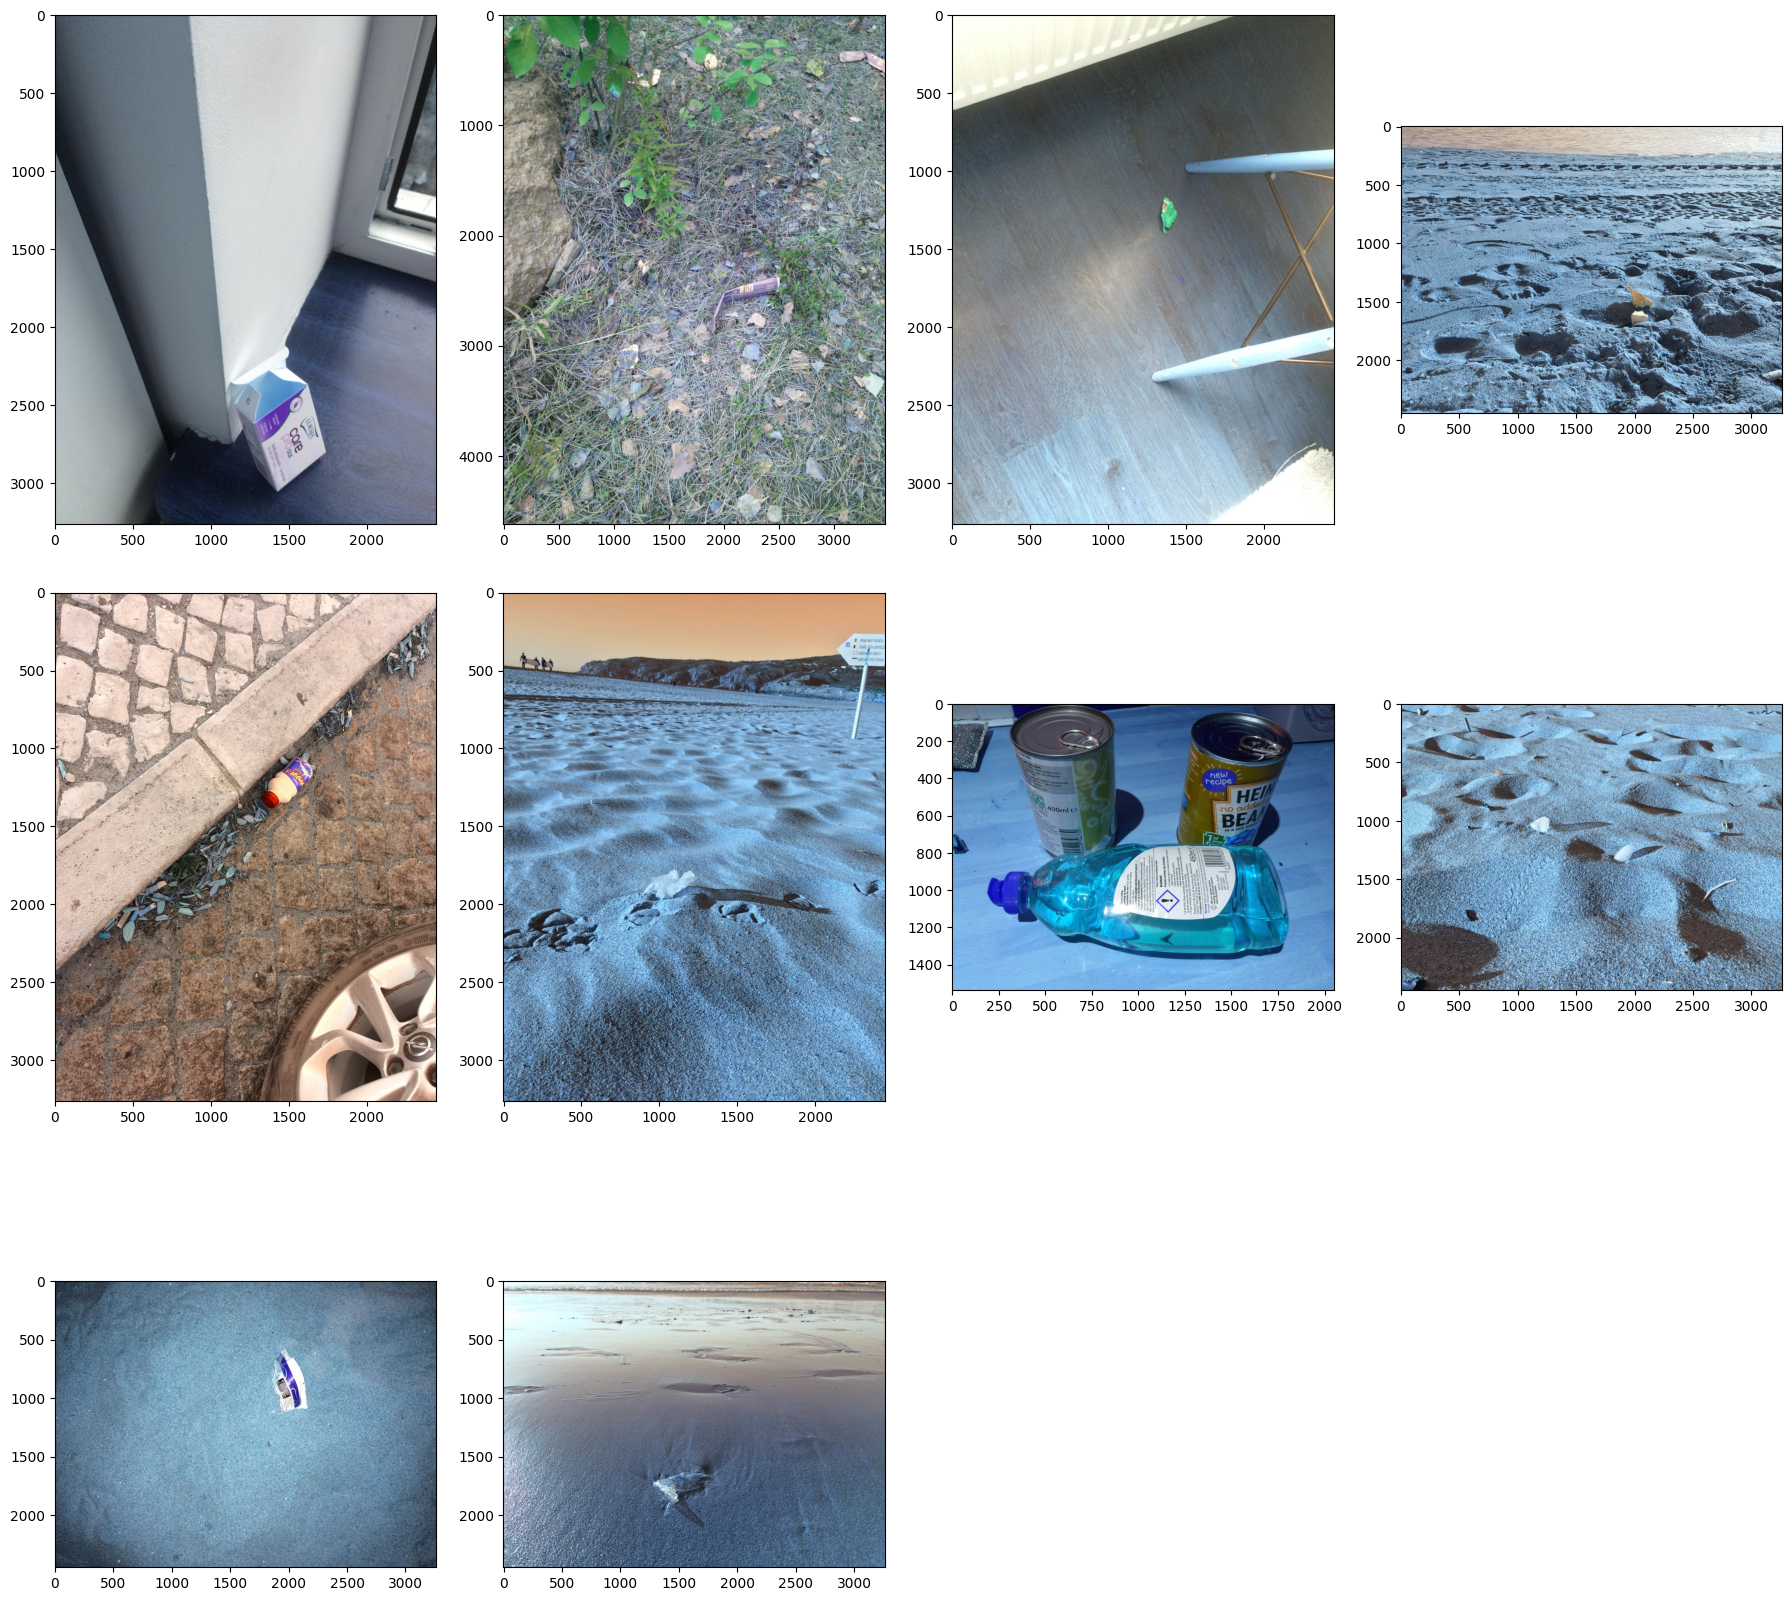

In [ ]:
show_images(images, 3, 4)

**Observation**

*   Images with different resolutions.
*   No much object were found in a single image.
*   Different lighting and brightness.
*   This dataset was build for a object segmentation task.



In [4]:
count = 0
for root_dir, dir, files in os.walk('/content/data/'):
  count += len(files)
print(f'{count} images found')

1501 images found


In [6]:
!git clone https://github.com/ultralytics/JSON2YOLO.git

Cloning into 'JSON2YOLO'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 358 (delta 205), reused 170 (delta 169), pack-reused 136
Receiving objects: 100% (358/358), 97.06 KiB | 4.04 MiB/s, done.
Resolving deltas: 100% (221/221), done.


In [17]:
from JSON2YOLO import labelbox_json2yolo, general_json2yolo

general_json2yolo.convert_infolks_json('dataset','/content/data/annotations.json', '/content/data/batch_1/')

TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str'

# Model for segmentation 🤖